<h2 align="center">pflacs: Faster loadcases and parameter studies</h2> 
<h4 align="center">enhancing the engineering design process with Python</h4> 
<h3 align="center">Stephen McEntee</h3>  
<h3 align="center">PyConIE 2019-10-12</h3>


### about me ...

- chartered mechanical engineer
- subsea / pipeline engineer in oil & gas industry since 1997
- Python programming since ~2003
- my own startup ``Qwilka``
    - developing ``Visinum`` data management and analytics platform 
    - unstructured engineering data from engineering survey
    - lidar, sonar, video, images, etc.
- website: https://qwilka.github.io/
- Github: https://github.com/qwilka
- Linkedin: https://www.linkedin.com/in/stephen-mcentee-51a187121



![2019-09-30_Visinum_screenshot3.jpg](img/2019-09-30_Visinum_screenshot_3.jpg)

![2019-09-30_Visinum_screenshot1.jpg](img/2019-09-30_Visinum_screenshot1.jpg)

## Scope

1. Motivation: automate engineering computations
1. Engineering: civil/mechanical/stuctural
1. Using Python to enhance the engineering design process
1. Introducing Python modules (open source, MIT licence):
    - ``pflacs`` faster load-cases and paramter studies
    - ``vntree`` tree data structure
    - ``PDover2t`` library of functions for pipelines design and analysis 


### The ``Barlow`` formula for hoop stress in a pressurised cylinder

$$\sigma_H = \frac{PD}{2t}$$  

<img src="img/hoop_stress_in_pipe_Elliotis_3.png" alt="hoop stress" title="Title text" style="display: inline-block; margin: 0" /> 
&nbsp;&nbsp;&nbsp;<small>image: 
<a href="https://creativecommons.org/licenses/by/3.0/">CC BY 3.0</a> 2013 <a href="https://www.researchgate.net/publication/290835187_A_Finite_Element_Approach_for_the_Elastic-Plastic_Behavior_of_a_Steel_Pipe_Used_to_Transport_Natural_Gas">Miltiades C. Elliotis</a>  
</small>

<h4 align="center">"pipeline engineering is nothing but PD/2t"</h4>

### Typical engineering design process (in brief)

- Establish the `Design Basis`
  - design parameters
  - constraints & assumptions
  - specify design codes and standards
- Plan analyses in hierarchical structure:
  - base-case
    - load cases
      - parameter studies
- Analyse in accordance with prescibed Design Code
  - Levels of analysis: 1, 2 and 3
- Final goal: compliance with design code
  - regulatory driven, not an optimisation process

## engineering design process workflow

- Iterative process (frequent re-work)
- Typical software tool chain:
  - spreadsheet (level 1 analysis)
  - computational worksheet (level 1 analysis)
  - finite element program (level 3 analysis)
  - word processor for reporting
- PC on every desk
  - GUI point-n-click environment
  - main productivity tool: copy-n-paste
- Manual paper-based workflows re-implemented on PCs

## Using Python for engineering computation: a simple example

Calculating water pressure:  $P = \rho \cdot g \cdot h $


$\rho$ is water density, &nbsp;&nbsp; $g$ is gravitational acceleration, &nbsp;&nbsp; $h$ is water depth ("head")

## Python script

water_pressure_script.py

***

```python
rho = 1025
g = 9.81
h = 10
pressure = rho * g * h
print(f"Inputs:\n\tdensity = {rho}")
print(f"\tg = {g}")
print(f"\tdepth = {h}")
print(f"Output:\n\twater pressure = {pressure}")
```

In [1]:
%run water_pressure_script.py

Inputs:
	density = 1025
	g = 9.81
	depth = 10
Output:
	water pressure = 100552.5


## Python function

water_pressure_function.py

***
```python
def water_pressure(h, rho, g=9.81):
	"""Calculate hydrostatic water pressure.
	
	:param h: water depth or head
	:param rho: water density
	:param g: gravitational acceleration
    :returns: hydrostatic water pressure
	"""
	return rho * g * h

```

In [2]:
from water_pressure_function import water_pressure
help(water_pressure)

Help on function water_pressure in module water_pressure_function:

water_pressure(h, rho, g=9.81)
    Calculate hydrostatic water pressure.
        
    :param h: water depth or head
    :param rho: water density
    :param g: gravitational acceleration
    :returns: hydrostatic water pressure



In [3]:
depth=10.0; density=1025.0
pressure = water_pressure(depth, density)
print(f"water pressure is {pressure} at {depth} depth.")
print(f"water pressure is {water_pressure(90, 1027.5, 9.79)} at 90 depth.")

water pressure is 100552.5 at 10.0 depth.
water pressure is 905330.2499999999 at 90 depth.


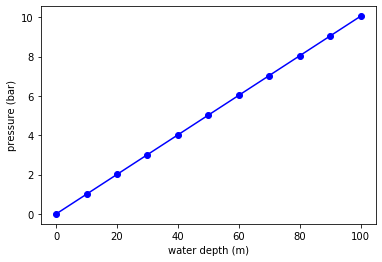

In [49]:
import numpy
depth = numpy.arange(0, 101, 10)
pressure = water_pressure(depth, 1025) * 10**-5
import matplotlib.pyplot as plt
plt.plot(depth, pressure, "bo-")
plt.xlabel('water depth (m)'); plt.ylabel('pressure (bar)');

## Python class

water_pressure_class.py

***
```python
class Ocean:

    def __init__(self, name, h, rho):
        self.name = name
        self.h = h
        self.rho = rho

    def water_pressure(self, h=None, rho=None, verbose=True):
        """Calculate hydrostatic water pressure.
        
        Note: gravitational acceleration is assumed to be 9.81 m/s2

        :param h: water depth or head
        :param rho: water density :math:`(\rho)`
        :param verbose: print result message
        :returns: hydrostatic water pressure       
        """
        _h = self.h if h is None else h
        _rho = self.rho if rho is None else rho
        g=9.81
        pressure = _rho * g * _h
        if verbose: print(f"{self.name} pressure is {pressure} at {_h} depth.")
        return  pressure
```

In [5]:
from water_pressure_class import Ocean
baltic = Ocean("Baltic", 55.0, 1010.0)
isea = Ocean("Irish Sea", 80.0, 1025.0)
baltic.water_pressure()
baltic.water_pressure(49.0)
baltic.water_pressure(10.0, rho=1005.0)
isea.water_pressure();

Baltic pressure is 544945.5 at 55.0 depth.
Baltic pressure is 485496.9 at 49.0 depth.
Baltic pressure is 98590.50000000001 at 10.0 depth.
Irish Sea pressure is 804420.0 at 80.0 depth.


# Objectives

flexibility
light-touch framework
minimise restrictions

## Basic usage of `pflacs`

In [6]:
import pflacs

basecase = pflacs.Premise("Base case", 
                      parameters={"a":10, "b":5} )

print(f"basecase.a={basecase.a} basecase.b={basecase.b}")

basecase.a=10 basecase.b=5


#### `pflacs.Premise.plugin_func` used  to 'plugin' or patch a function

In [7]:
def add_nums(a, b, c=0):
    """Function adds 2 or 3 numbers, and returns the sum."""
    return a + b + c

In [8]:
basecase.plugin_func(add_nums)
basecase.add_nums

In [9]:
pflacs.Premise.add_nums

In [10]:
basecase.add_nums is add_nums

False

In [11]:
help(basecase.add_nums)

Help on Function in module __main__:

add_nums(a, b, c=0)
    Function adds 2 or 3 numbers, and returns the sum.



In [12]:
basecase.add_nums()

15

In [13]:
basecase.a + basecase.b == basecase.add_nums()

True

In [14]:
basecase.add_nums(b=-3)

7

In [15]:
basecase.a + (-3) == basecase.add_nums(b=-3)

True

In [16]:
basecase.b

5

In [17]:
basecase.add_nums(5, 4.02, -3)

6.02

In [18]:
5 + 4.02 + (-3) == basecase.add_nums(5, 4.02, -3)

True

In [19]:
print(f"basecase.a={basecase.a}, basecase.b={basecase.b}")

basecase.a=10, basecase.b=5


#### let's plugin another funcion

In [20]:
def sub_nums(x, y, z=0):
    """Function subtracts 2 or 3 numbers, and returns the result."""
    return x - y - z

In [21]:
basecase.plugin_func(sub_nums, argmap={"x":"a", "y":"b", "z":"c"} )

True

In [22]:
basecase.add_param("c", 6.5)

True

In [23]:
basecase.c

6.5

In [24]:
basecase.sub_nums()

-1.5

In [25]:
basecase.a - basecase.b - basecase.c == basecase.sub_nums()

True

`pflacs.Premise` is a tree

In [26]:
import vntree
issubclass(pflacs.Premise, vntree.Node)

True

let's make a new loadcase, based on `basecase`

In [27]:
lc1 = pflacs.Premise("Load case 1", parent=basecase, parameters={"a":100})
lc1.parent.name

'Base case'

In [28]:
print(basecase.to_texttree())

| Base case
+--| Load case 1



In [29]:
lc1.add_nums()

111.5

In [30]:
lc1.a + lc1.b + lc1.c == lc1.add_nums()

True

In [31]:
print(f"lc1.a = {lc1.a}, basecase.a = {basecase.a}")

lc1.a = 100, basecase.a = 10


In [32]:
print(f"lc1.b = {lc1.b}, basecase.b = {basecase.b}")

lc1.b = 5, basecase.b = 5


In [33]:
lc1.b is basecase.b

True

#### introducing `pflacs.Calc`

In [34]:
issubclass(pflacs.Calc, pflacs.Premise)

True

In [35]:
lc1_1 = pflacs.Calc("Load case 1-1 «sub_nums()»", lc1, funcname="sub_nums")
print(lc1_1._root.to_texttree(func=lambda n: f" {n.name} (node type: {n.__class__.__name__})"))

| Base case (node type: Premise)
+--| Load case 1 (node type: Premise)
.  +--| Load case 1-1 «sub_nums()» (node type: Calc)



In [36]:
lc1_1.a - lc1_1.b - lc1_1.c == lc1_1()

True

In [37]:
lc1_1._sub_nums

88.5

In [38]:
lc1_2 = pflacs.Calc("Load case 1-2 «add_nums()»", 
                    lc1, 
                    funcname="add_nums", 
                    argmap={"return":"add_nums_result"})
lc1_2()
lc1_2.add_nums_result

111.5

#### make a Pandas dataframe from the result of the `Calc` node execution

In [39]:
lc1_2.to_dataframe()   # dataframe stored in lc1_2._df

,a,b,c,add_nums_result
0,100,5,6.5,111.5


#### let's make a new loadcase

In [40]:
lc2 = basecase.add_child( lc1.copy() )  # method vntree.Node.copy clones a node or branch

#### changing the attribute values in the new nodes

In [41]:
lc2.name = "Load case 2"
lc2.a = 200
lc2_1 = lc2.get_child_by_name("Load case 1-1 «sub_nums()»")  # using vntree.Node.get_child_by_name
lc2_1.name = "Load case 2-1 «sub_nums()»»"
lc2_2 = lc2.get_child_by_name("Load case 1-2 «add_nums()»")
lc2_2.name = "Load case 2-2 «add_nums()»"

#### Let's plugin another function

In [42]:
def multipily_xyz(k:"a", l:"b", m:"c" = 1) -> "mult_nums_result":
    """Function multiplies 2 or 3 numbers, and returns the product."""
    return k * l * m

basecase.plugin_func(multipily_xyz, newname="mult_nums")

True

Using function annotations instead of `pflacs.Premise.plugin_func` argument `argmap` to re-map argument names and return attribute

"Python does not attach any particular meaning or significance to annotations"

"annotation consumers can do anything they want with a function's annotations"

[PEP 3107](https://www.python.org/dev/peps/pep-3107/#id29)

let's create another load case with `pflacs.Calc`

In [43]:
lc3 = pflacs.Calc("Load case 3 «mult_nums»", basecase, funcname="mult_nums")
import numpy
lc3.b = numpy.linspace(0,10,5)
lc3()
lc3.to_dataframe()

,a,b,c,mult_nums_result
0,10,0.0,6.5,0.0
1,10,2.5,6.5,162.5
2,10,5.0,6.5,325.0
3,10,7.5,6.5,487.5
4,10,10.0,6.5,650.0


#### Let’s take a look at the tree structure of the study we have built:

In [44]:
print(basecase.to_texttree())

| Base case
+--| Load case 1
.  +--| Load case 1-1 «sub_nums()»
.  .  | Load case 1-2 «add_nums()»
.  | Load case 2
.  +--| Load case 2-1 «sub_nums()»»
.  .  | Load case 2-2 «add_nums()»
.  | Load case 3 «mult_nums»



Each `vntree.Node` instance is a generator, so the tree can be traversed simply by interating over the root node. 
To re-execute the Calc nodes:

In [45]:
for node in basecase:
    if type(node) == pflacs.Calc:
        result = node()
        print(f"{node.name} calculated {result}")

Load case 1-1 «sub_nums()» calculated 88.5
Load case 1-2 «add_nums()» calculated 111.5
Load case 2-1 «sub_nums()»» calculated 188.5
Load case 2-2 «add_nums()» calculated 211.5
Load case 3 «mult_nums» calculated [  0.  162.5 325.  487.5 650. ]


Now that our study has been re-calculated, we will save it as `Pickle` file:

In [46]:
basecase.savefile("basic_usage_example.pflacs")

True

To re-open the study, we would use the class method `pflacs.Premise.openfile` that is inherited from `vntree.Node` 

In [47]:
new_study = pflacs.Premise.openfile("basic_usage_example.pflacs")
print(new_study.to_texttree())

| Base case
+--| Load case 1
.  +--| Load case 1-1 «sub_nums()»
.  .  | Load case 1-2 «add_nums()»
.  | Load case 2
.  +--| Load case 2-1 «sub_nums()»»
.  .  | Load case 2-2 «add_nums()»
.  | Load case 3 «mult_nums»



#### For large projects, saving results in a `Pickle` file could be inconvenient, so the results from `pflacs.Calc` nodes can be saved in a `HDF5` file:

In [48]:
for node in basecase:
    if type(node) == pflacs.Calc:
        node.to_hdf5()

![basic_usage_example_HDFView](img/basic_usage_example_HDFView.jpg)

# the end...

### thanks very much